In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data=pd.read_excel(r'C:\Users\LENOVO\Desktop\arastirmalar\Multiple_Linear_Regression\data.xlsx')
print(data.head())
print(data.shape)

   Year  Population  electricity generation(GWh)  \
0  1970    34876296                       8623.0   
1  1971    35720603                       9781.0   
2  1972    36587267                      11242.0   
3  1973    37472329                      12425.0   
4  1974    38370278                      13477.0   

   CO2 Emission(metric tons per capita)  GDP(current US$)  \
0                              1.223000      1.708700e+10   
1                              1.336297      1.625662e+10   
2                              1.472021      2.043110e+10   
3                              1.587467      2.572438e+10   
4                              1.593322      3.559991e+10   

   electricity consumption(GWh)  
0                        7308.0  
1                        8289.0  
2                        9527.0  
3                       10530.0  
4                       11359.0  
(50, 6)


There are 6 features. The electricity consumption is estimated using the first 5 features. The dataset includes the years between 1970 and 2019. The model estimates electricity consumption between 2020-2029.

In [3]:
Year=data.iloc[:,0:1]
X=data.iloc[:,0:5].values
y=data.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9997325775824999
0.999675140902753


The results obtained above show no signs of overfitting or underfitting.

In [7]:
import statsmodels.api as sm
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)
X_new=X[:,[0,1,2,3,4]]
model_regresyon=sm.OLS(endog=y,exog=X_new).fit()
print(model_regresyon.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.191e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           4.93e-79
Time:                        12:09:16   Log-Likelihood:                -435.41
No. Observations:                  50   AIC:                             878.8
Df Residuals:                      46   BIC:                             886.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.701e+06   4.48e+05      8.259      0.0

The p-value indicates how useful a feature is to the model. For this, the p-value have to be less than 0.05. When the table above is examined, it can be seen that all the features are useful.

In [8]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,\
median_absolute_error,r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Median Absolute Error:",median_absolute_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Mean Absolute Error: 1324.5685611352576
Mean Squared Error: 2465886.435587086
Median Absolute Error: 1190.679013856512
r2_score: 0.999675140902753
Mean Squared Error: 2465886.435587086


In [9]:
prediction_data=pd.read_excel(r'C:\Users\LENOVO\Desktop\arastirmalar\Multiple_Linear_Regression\prediction_data.xlsx')
print(prediction_data.head(10))
print(prediction_data.shape)

   Year  Population  electricity generation(GWh)  \
0  2020    84339067                       309759   
1  2021    85042738                       315734   
2  2022    85561976                       321824   
3  2023    85957253                       328031   
4  2024    86316463                       334359   
5  2025    86705224                       340808   
6  2026    87190773                       347382   
7  2027    87679041                       354082   
8  2028    88170044                       360912   
9  2029    88663796                       367873   

   CO2 Emission(metric tons per capita)  GDP(current US$)  \
0                              5.339805      7.761151e+11   
1                              5.442802      7.910852e+11   
2                              5.547786      8.063441e+11   
3                              5.654795      8.218974e+11   
4                              5.763868      8.377506e+11   
5                              5.875045      8.539096e+11   


The features to be estimated are given above. The electricity consumption column is empty. Because this column will be estimated. Other features are found by calculating the average of the rate of change of values between 2010-2019. Source [3] was used for the population column.

In [10]:
year=prediction_data.iloc[:,0:1]
X_prediction_data=prediction_data.iloc[:,0:5].values
y_prediction_data=prediction_data.iloc[:,-1].values

In [11]:
y_pred=lr.predict(X_prediction_data)
print(y_pred)

[259699.28195579 263126.83175331 265660.01825208 267624.73399418
 269495.46737105 271624.14389739 274374.49656949 277243.02382581
 280233.03590942 283345.49059143]


In [12]:
new_year=Year.append(year)
YEAR=new_year.to_numpy()

In [13]:
consumption=data.iloc[:,5].values
electricity_consumption=np.concatenate((consumption,y_pred))
s1=pd.DataFrame(data=YEAR,columns=['Year'])
s2=pd.DataFrame(data=electricity_consumption,columns=['Electricity Consumption(GWh)'])
prediction_results=pd.concat([s1,s2],axis=1)
print(prediction_results)

    Year  Electricity Consumption(GWh)
0   1970                   7308.000000
1   1971                   8289.000000
2   1972                   9527.000000
3   1973                  10530.000000
4   1974                  11359.000000
5   1975                  13492.000000
6   1976                  16079.000000
7   1977                  17969.000000
8   1978                  18934.000000
9   1979                  19633.000000
10  1980                  20398.000000
11  1981                  22030.000000
12  1982                  23587.000000
13  1983                  24465.000000
14  1984                  27635.000000
15  1985                  29709.000000
16  1986                  32210.000000
17  1987                  36697.000000
18  1988                  39722.000000
19  1989                  43120.000000
20  1990                  46820.000000
21  1991                  49283.000000
22  1992                  53985.000000
23  1993                  59237.000000
24  1994                 

All values can be seen above. The graph of the values can be seen below.

Text(0.5, 1.0, 'Electricity Consumption in Turkey')

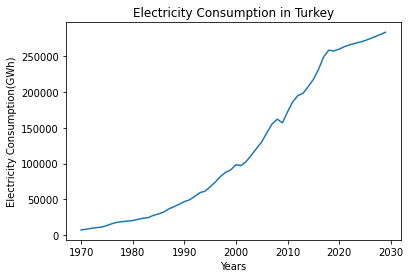

In [14]:
plt.plot(YEAR,electricity_consumption)
plt.xlabel('Years')
plt.ylabel('Electricity Consumption(GWh)')
plt.title('Electricity Consumption in Turkey')

Text(0.5, 1.0, 'Population in Turkey')

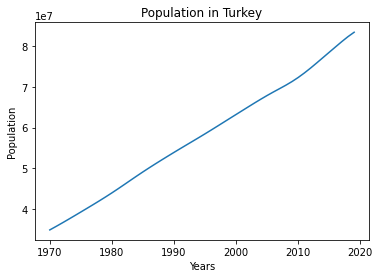

In [15]:
population=data.iloc[:,1].values
plt.plot(Year,population)
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population in Turkey')

Text(0.5, 1.0, 'Electricity Generation in Turkey')

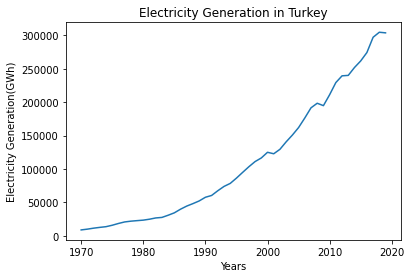

In [16]:
electricity_generation=data.iloc[:,2].values
plt.plot(Year,electricity_generation)
plt.xlabel('Years')
plt.ylabel('Electricity Generation(GWh)')
plt.title('Electricity Generation in Turkey')

Text(0.5, 1.0, 'CO2 Emission in Turkey')

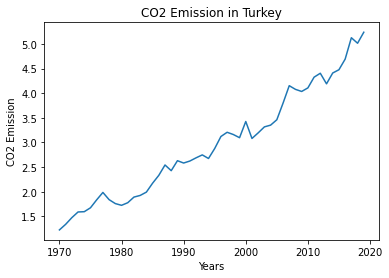

In [17]:
CO2_emission=data.iloc[:,3].values
plt.plot(Year,CO2_emission)
plt.xlabel('Years')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission in Turkey')

Text(0.5, 1.0, 'GDP(current US$) in Turkey')

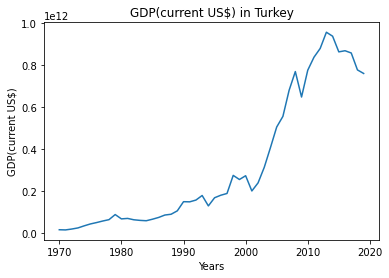

In [18]:
GDP=data.iloc[:,4].values
plt.plot(Year,GDP)
plt.xlabel('Years')
plt.ylabel('GDP(current US$)')
plt.title('GDP(current US$) in Turkey')